In [182]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tab-hack-20/Week8_test.csv
/kaggle/input/tab-hack-20/Week8_train.csv


In [183]:
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [184]:
test = pd.read_csv("../input/tab-hack-20/Week8_test.csv", index_col = 'id')
train = pd.read_csv("../input/tab-hack-20/Week8_train.csv", index_col = 'id')

In [185]:
train.shape, test.shape

((110899, 482), (110899, 481))

In [186]:
train.head()

,PARTY_ID,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,...,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482,TARGET
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.000000,0.0,0.0,0
1,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,26.010373,0.0,0.0,0
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2248.357090,0.0,0.0,1
3,NaN,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,2285.146561,0.0,0.0,0
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,98.395599,0.0,0.0,0


In [187]:
train.columns

Index(['PARTY_ID', 'V_1', 'V_2', 'V_3', 'V_4', 'V_5', 'V_6', 'V_7', 'V_8',
       'V_9',
       ...
       'V_474', 'V_475', 'V_476', 'V_477', 'V_478', 'V_479', 'V_480', 'V_481',
       'V_482', 'TARGET'],
      dtype='object', length=482)

In [188]:
train.describe()

,PARTY_ID,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,...,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482,TARGET
count,0.0,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,...,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000
mean,NaN,0.002570,0.022931,0.007791,0.011425,1.235052,0.000090,0.061867,0.372077,0.017962,...,0.005293,0.002173,0.015834,0.015401,0.793271,0.049928,980.660380,183.764786,59.324373,0.194159
std,NaN,0.058249,0.230278,0.110874,0.107624,2.991882,0.009496,0.304915,1.212413,0.161437,...,0.082778,0.051003,0.148823,0.193999,1.785113,0.348936,3488.097963,2053.530911,2713.893234,0.395553
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1069.611493,0.000000,0.000000,0.000000
max,NaN,7.000000,36.000000,6.000000,3.000000,224.000000,1.000000,7.000000,71.000000,15.000000,...,11.000000,5.000000,6.000000,11.000000,41.000000,23.000000,382407.611200,213450.998200,308597.646000,1.000000


In [189]:
train.drop(columns = 'PARTY_ID', inplace=True, axis = 1)
test.drop('PARTY_ID', inplace=True, axis = 1)

In [190]:
target = train.pop('TARGET')

In [191]:
nullcol = train.isnull().sum()

In [192]:
nullcol[nullcol>0]

V_301    6331
V_304    1561
V_434    6335
dtype: int64

In [193]:
#plt.figure(figsize=(18,7))
#sns.heatmap(train.isnull(), xticklabels = False, yticklabels = False)
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

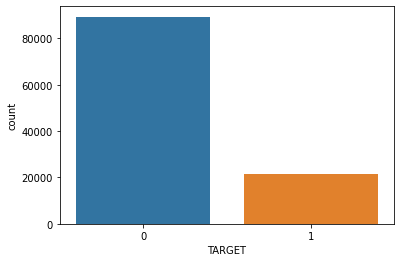

In [194]:
sns.countplot(x = target)
plt.show

In [195]:
target.value_counts()

0    89367
1    21532
Name: TARGET, dtype: int64

In [196]:
cat_cols = [c for c in train.columns if train.dtypes[c] == 'object']
num_cols = [c for c in train.columns if (train.dtypes[c] == 'int64') or (train.dtypes[c] == 'float64')]

In [197]:
cat_cols

['V_245', 'V_271', 'V_301', 'V_304', 'V_316', 'V_400', 'V_410', 'V_434']

In [198]:
for i in cat_cols:
    print(i,'\t', train[i].nunique())

V_245 	 2
V_271 	 7
V_301 	 15
V_304 	 2
V_316 	 3
V_400 	 3
V_410 	 2
V_434 	 85


In [199]:
train.shape

(110899, 480)

**imputer**

In [200]:
imp = SimpleImputer(strategy = 'most_frequent')
train = pd.DataFrame(imp.fit_transform(train), columns = train.columns, index = train.index)
test = pd.DataFrame(imp.transform(test), columns = test.columns, index = test.index)

In [201]:
train.isna().sum().sum()

0

**One Hot Encoding**

In [202]:
ohe = ['V_245','V_271','V_304','V_316','V_400','V_410']
train = pd.get_dummies(train, columns=ohe)
test = pd.get_dummies(test, columns=ohe)

In [203]:
train.head()

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,...,V_304_F,V_304_M,V_316_F,V_316_M,V_316_U,V_400_E,V_400_F,V_400_U,V_410_C,V_410_N
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0.0,...,1,0,1,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,110.038907,...,0,1,1,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0.0,...,0,1,0,1,0,0,1,0,1,0
3,0,0,0,0,2,0,0,0,0,103.288586,...,0,1,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0.0,...,0,1,0,1,0,0,1,0,0,1


**ordinal encode**

In [204]:
ordinal = OrdinalEncoder()
ord_col = ['V_301', 'V_434']

In [205]:
k1 = ordinal.fit_transform(train[ord_col])
k2 = ordinal.transform(test[ord_col])

k1 = pd.DataFrame(k1, columns = ['V_301_new', 'V_434_new'])
k2 = pd.DataFrame(k2, columns = ['V_301_new', 'V_434_new'])

train.drop(['V_301', 'V_434'], inplace=True, axis = 1)
test.drop(['V_301', 'V_434'], inplace=True, axis = 1)

In [206]:
train = pd.concat([train, k1], axis=1, join='inner')
test = pd.concat([test, k2], axis=1, join='inner')

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from xgboost import plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [208]:
x= train
y = target

In [209]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3)

**scaler**

In [210]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(train), columns = train.columns, index = train.index)
#x = scaler.fit_transform(train)
test_sc = pd.DataFrame(scaler.transform(test), columns = test.columns, index = test.index)

In [211]:
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [212]:
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [213]:
#Undersampling
x_train_2, y_train_2= make_imbalance(x, y, sampling_strategy={0: 25000, 1: 21000},random_state=1)

In [214]:
y_train_2.value_counts()

0    25000
1    21000
Name: TARGET, dtype: int64

In [215]:
#oversampling
smote = SMOTE(random_state = 1)
x_train_1, y_train_1 = smote.fit_resample(x_train, y_train)
x1,y1 = smote.fit_resample(x,y)

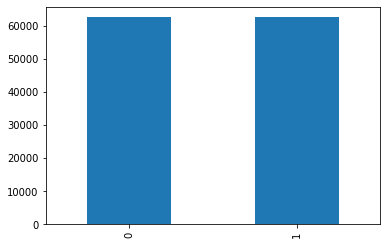

In [216]:
y_train_1.value_counts().plot(kind='bar')
plt.show()

In [217]:
x_train_1 = scaler.fit_transform(x_train_1)

In [218]:
lr = LogisticRegression()
xgb = XGBClassifier()

In [219]:
def classification(X_tr,y_tr,X_te,y_te,method):    
    
    method.fit(X_tr,y_tr)
    p_train = method.predict(X_tr)
    p_test = method.predict(X_te)
        
    print('train f1 score')
    print(f1_score(y_tr, p_train))
    print('test f1 score')
    print(f1_score(y_te, p_test))
    print('-'*20)
    
    plt.figure(figsize=(15,6))
    sns.heatmap(confusion_matrix(y_te,p_test),annot=True)
    plt.tight_layout()
    plt.show()

train f1 score
0.7111505701523181
test f1 score
0.5119014281713805
--------------------


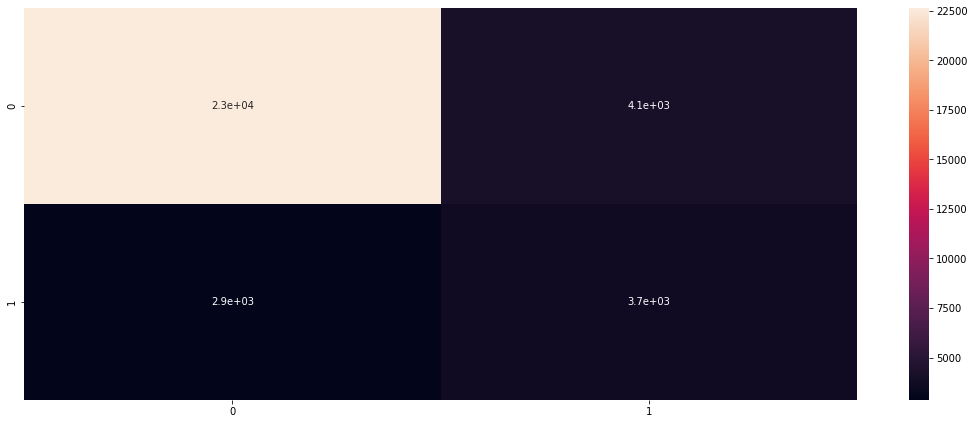

In [220]:
classification(x_train_2, y_train_2,x_val, y_val,xgb)

train f1 score
0.9014660816269676
test f1 score
0.3277625593727224
--------------------


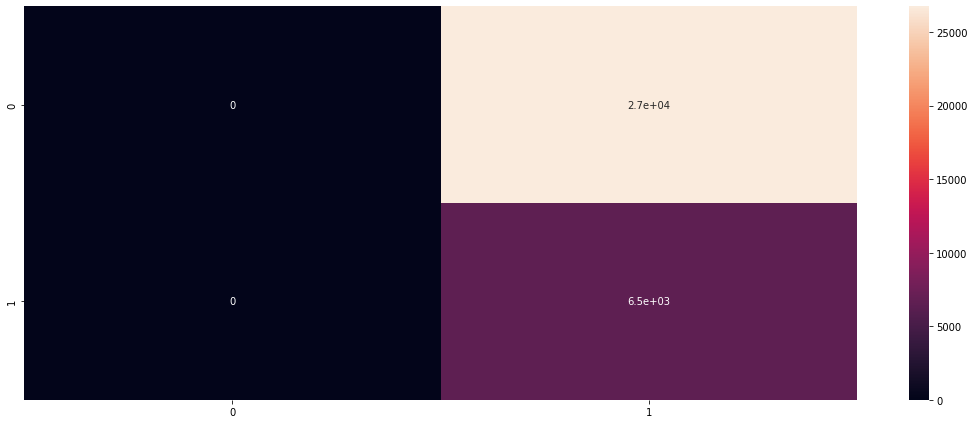

In [221]:
classification(x_train_1, y_train_1,x_val, y_val,xgb)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


train f1 score
0.4850083199899533
test f1 score
0.3834405144694534
--------------------


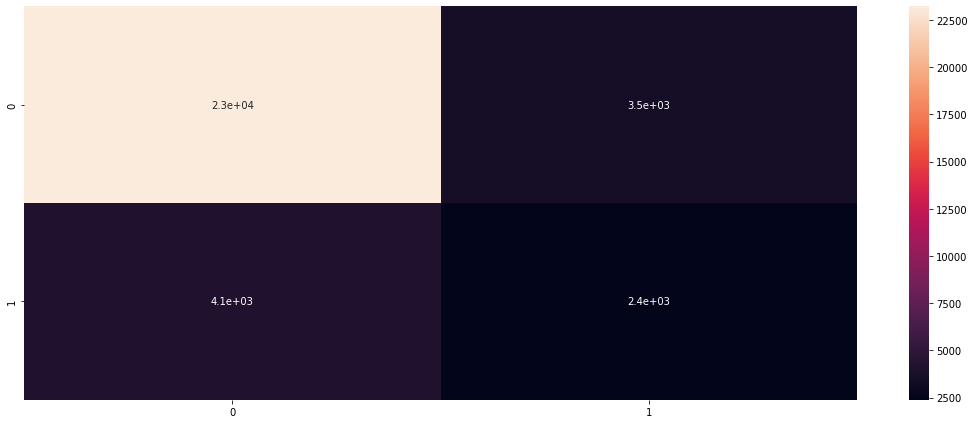

In [222]:
classification(x_train_2, y_train_2,x_val, y_val,lr)

In [223]:
#rf = RandomForestClassifier(max_features=0.1, max_leaf_nodes=102, n_estimators=356)

In [224]:
#pca_all = PCA(n_components = 0.9, random_state = 2022)
#x_pca_all = pca_all.fit_transform(x.values)

In [225]:
#pca_all.explained_variance_ratio_ *100

In [226]:
#np.cumsum(pca_all.explained_variance_ratio_ *100)[450]

In [227]:
#x_pca_all.shape

In [228]:
lgbm1 = LGBMClassifier(colsample_bytree=0.54,
                       learning_rate=0.009,
                       max_bin=1023,
                       min_child_samples=3,
                       n_estimators=1500,
                       num_leaves=4,
                       reg_alpha=15, reg_lambda=35)

In [229]:
lgbm1.fit(x_train_2.values,y_train_2)

LGBMClassifier(colsample_bytree=0.54, learning_rate=0.009, max_bin=1023,
               min_child_samples=3, n_estimators=1500, num_leaves=4,
               reg_alpha=15, reg_lambda=35)

train f1 score
0.5447994802433406
test f1 score
0.4288589103376313
--------------------


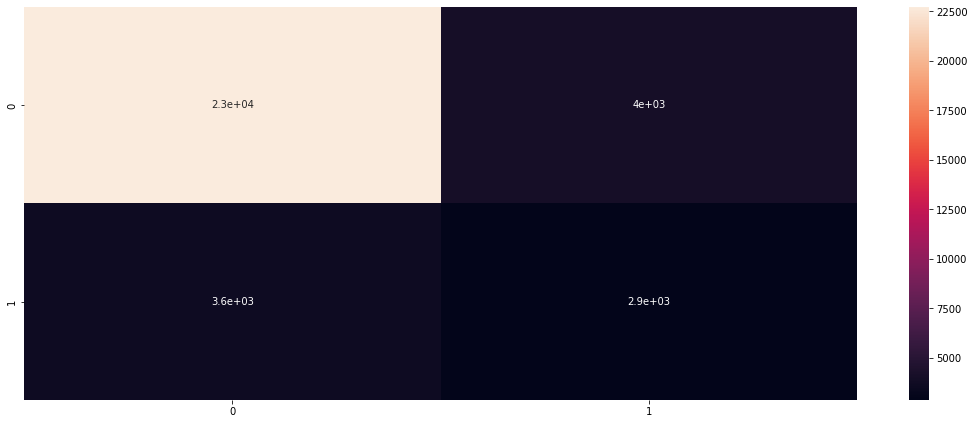

In [230]:
#f1_score(y_val, lgbml.predict(x_val))
classification(x_train_2, y_train_2,x_val, y_val,lgbm1)

Feature importances:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
   5   1   0   0   1   0   0   0 369   0   0   0   0   0   2   0   0  51
   0   0   0   0   0 347   0   0   0   0   0   0   0   0  22   0   0   4
   0   0   0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   2   0   3   0   0   0   0   0   2  11   0   0
   0   0   0   0   0   0  96   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 339   0   0   0   0   0   0
   0   0  35   0   0   1   0   0 184   0   0   0   1   0   0   0   0   1
   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7
   0   0   0   3   0   0   0   0   0   0   0   0   0   0   7   0   0   0
   0   1   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
   0   4 138   0   0   0   0   0   0   0   0   0   0   5   0   0   0   0
   0   0   0   0   9   0   0 

Text(0.5, 1.0, 'Visualizing Important Features')

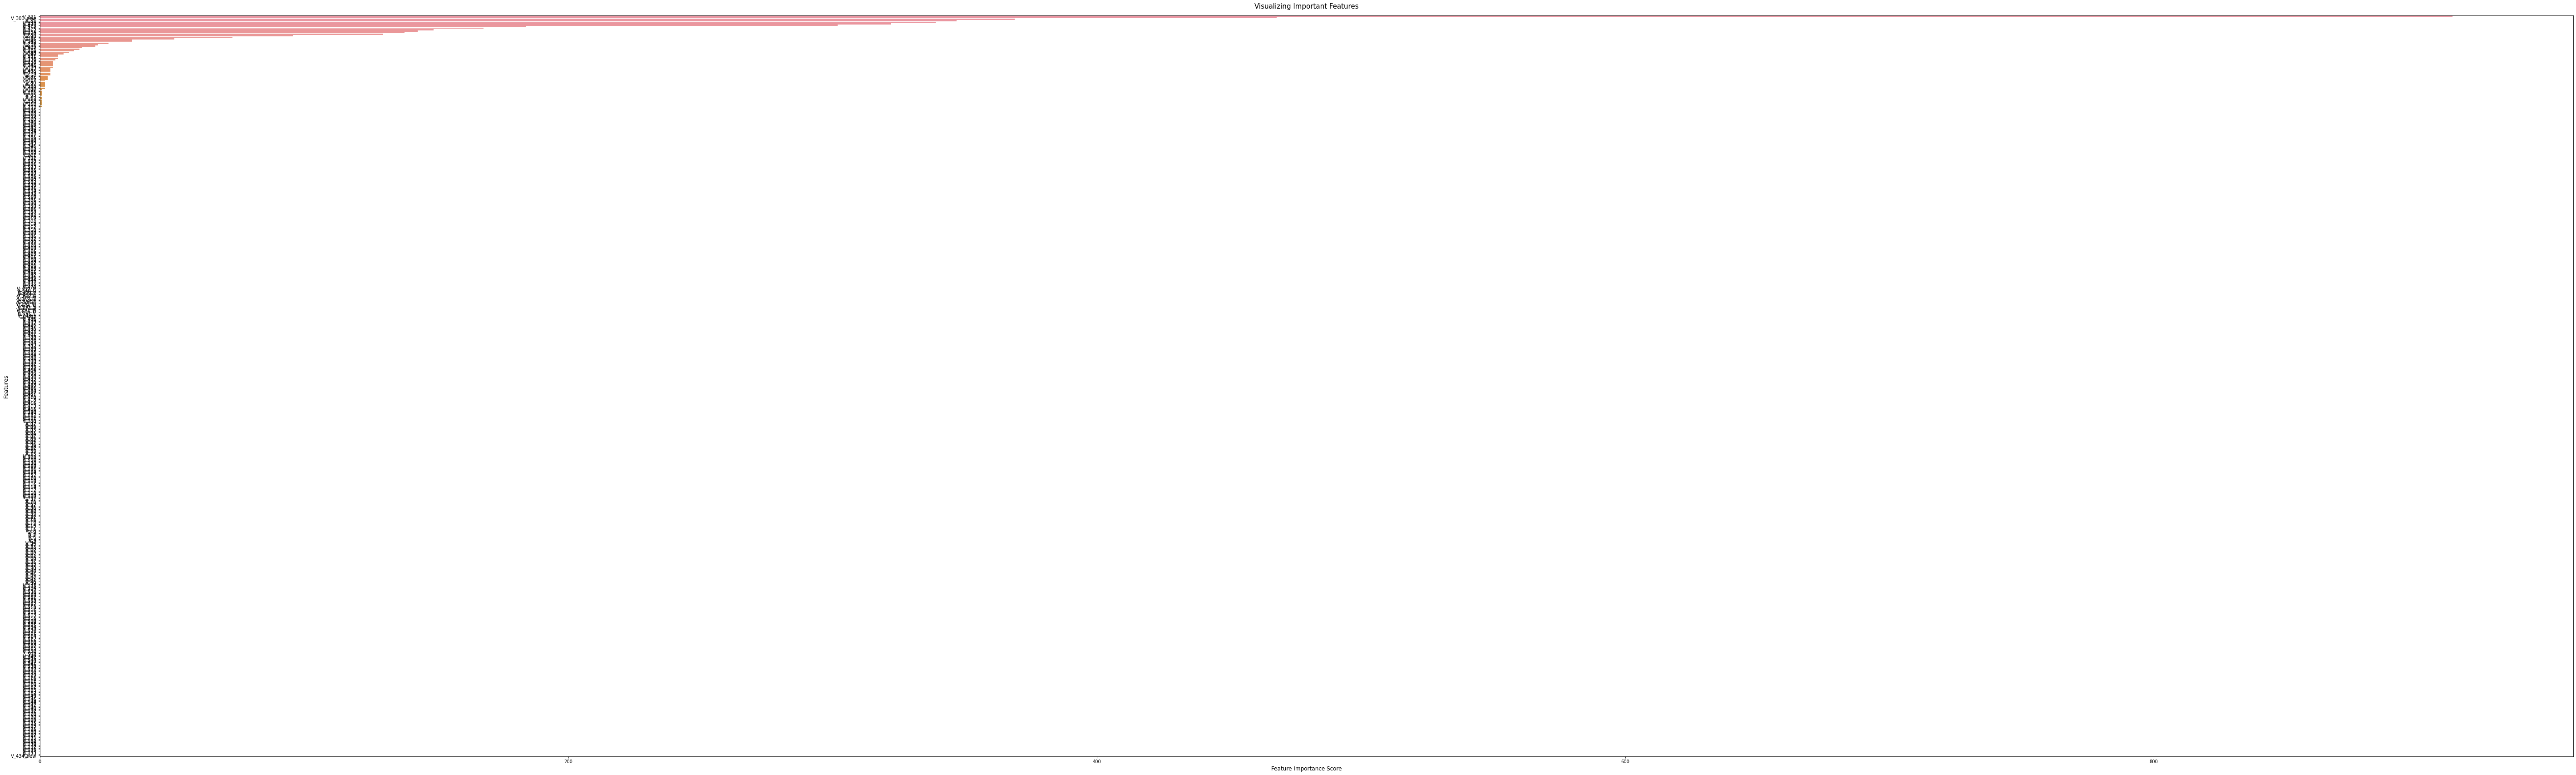

In [231]:
feature_imp = pd.Series(lgbm1.feature_importances_, 
                        index=train.columns).sort_values(ascending=False)
plt.figure(figsize=(100,30))
print('Feature importances: ', lgbm1.feature_importances_)
print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)

In [232]:
feature_imp.tail(200)

V_105        0
V_266        0
V_106        0
V_131        0
V_130        0
            ..
V_175        0
V_174        0
V_173        0
V_172        0
V_434_new    0
Length: 200, dtype: int32

In [233]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(lgbm1, threshold=25)
features_important = selector.fit_transform(x_train_2.values, y_train_2)

print('Data with selected features')
print(pd.DataFrame(features_important).head())

Data with selected features
         0         1        2         3         4         5         6   \
0 -0.090999  0.089807 -0.12147 -0.086591 -0.054523 -0.172652 -0.063376   
1 -0.090999  0.338184 -0.12147 -0.086591 -0.054523 -0.210069 -0.063376   
2 -0.090999 -0.379086 -0.12147 -0.086591 -0.054523 -0.210069 -0.063376   
3 -0.090999  0.224631 -0.12147 -0.086591 -0.054523 -0.172652 -0.063376   
4 -0.090999  0.029856 -0.12147 -0.086591 -0.054523 -0.172652 -0.063376   

        7         8         9         10        11        12        13  \
0 -0.10853 -0.124799 -0.157604 -0.261126 -0.310942 -0.127194 -0.193884   
1 -0.10853 -0.124799 -0.119142 -0.261126 -0.310942 -0.127194 -0.193884   
2 -0.10853 -0.124799  2.265488 -0.261126 -0.310942 -0.127194 -0.193884   
3 -0.10853 -0.124799 -0.196066 -0.261126 -0.310942 -0.127194 -0.193884   
4 -0.10853 -0.124799 -0.157604 -0.261126 -0.310942 -0.127194 -0.193884   

         14        15        16        17        18  
0 -0.598940 -0.573502 -0.218

In [234]:
lgbm1.fit(features_important, y_train_2)

LGBMClassifier(colsample_bytree=0.54, learning_rate=0.009, max_bin=1023,
               min_child_samples=3, n_estimators=1500, num_leaves=4,
               reg_alpha=15, reg_lambda=35)

In [235]:
impfeat_test = selector.transform(test_sc.values)

In [236]:
preds1 = lgbm1.predict(impfeat_test)

In [237]:
#preds = xgb.predict(test_sc.values)

In [238]:
output = pd.DataFrame({'id': test.index,'TARGET': preds1})
output.to_csv('./sub_lgbm1_featimp_25.csv', index=False)